![Banner-Introducci-n.png](https://i.postimg.cc/VkCcqsvv/Banner-Introducci-n.png)

# Introducción a ciencia de datos


## L1: Pruebas de correlación de Pearson y Spearman

De acuerdo con el caso de uso del sector **retail**  se van a desarrollar en los temas vistos en las infografías y videos anteriores

### Objetivos
1. Identificar los diferentes tipos de correlación
2. Usar las herramientas brindadas por python para el cálculo de estas medidas
3. Probar las hipótesis propuestas con los temas vistos

**Autor:** David Ocampo

d.ocampo@uniandes.edu.co

### 1. Contexto del caso
La organización quiere investigar la relación que tienen los precios con los datos relacionados con los envíos, esto debido a que existe una gran demanda de pedidos y se quiere conocer cómo generar estrategias comerciales relacionadas con los pedidos, que permitan ofrecerle mejores precios a los clientes desde el origen del incremento en la venta final(incluído, el envío). Se le ha pedido al área de Ciencia de Datos identificar posibles patrones para encontrar dónde focalizar la estrategia correcta


### 2. Importación de librerías y archivos
En las siguientes líneas de código se importaran los materiales de trabajo necesarios para desarrollar el caso de uso, en esto se incluyen las *librerías y los datos*

In [1]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para comando de sistema
import os
# Librería para manejo de datos
import pandas as pd
#Librería para gráficos
import matplotlib.pyplot as plt

In [2]:
# cargar los datos en csv
data= pd.read_csv('Ordenes_productos_C1_M2.csv', sep=';',encoding='latin-1')

Es importante tener en cuenta la visualización de los datos porque además de contexto se puede entender mucho mejor de qué se está hablando y qué tipos de datos se han cargado desde la máquina

In [3]:
#visualizar los primeros registros
data.head(5)

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18


Los tipos de datos nos van a ayudar a entender qué análisis se pueden realizar con cada variable para su correcta interpretación

In [4]:
# Revisar los tipos de data en el archivo
data.dtypes

orden_id                          object
order_item_id                     object
producto_id                       object
vendedor_id                       object
fecha_envio_limite                object
precio                           float64
valor_flete                      float64
codigo_postal_vendedor             int64
ciudad_vendedor                   object
departamento_vendedor             object
nombre_categoria_producto         object
longitud_nombre_producto           int64
longitud_descripcion_producto      int64
cantidad_fotos_producto            int64
peso_g_producto                    int64
longitud_cm_producto               int64
altura_cm_producto                 int64
ancho_cm_producto                  int64
dtype: object

### 3. Correlación de Pearson
Es una medida de la relación lineal entre dos variables. De manera menos formal, podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.

**Hipótesis:** La organización está interesada en investigar si el precio de los productos influye en el peso de los mismos

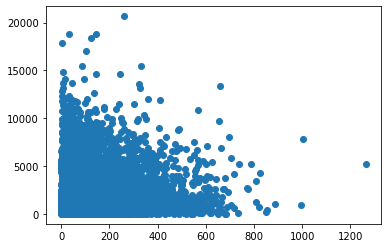

In [5]:
# Revisar la dispersión de los datos de precio y peso
plt.scatter(data['precio'], data['peso_g_producto']);

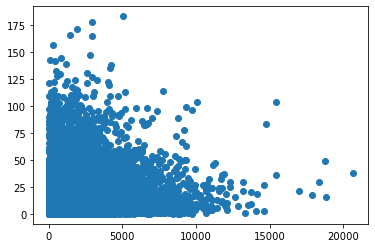

In [6]:
# Revisar la dispersión de los datos de precio y peso
plt.scatter(data['peso_g_producto'], data['valor_flete']);

En las siguientes líneas de código vamos calcular la correlación lineal que tienen los datos mostrados anteriormente, para así darle una trascendencia más allá de lo gráficamente visto, para esto además, vamos a calcular la correlación con todas las demás variables numéricas que existan 

In [7]:
# Calcular coeficiente de pearson para todos los datos numéricos
data[['precio','valor_flete','peso_g_producto']].corr(method='pearson')

,precio,valor_flete,peso_g_producto
precio,1.000000,0.004075,0.000687
valor_flete,0.004075,1.000000,-0.007394
peso_g_producto,0.000687,-0.007394,1.000000


Análisis: Vemos que no existe una relación lineal entre el precio y el peso del producto, tampoco podemos ver esta relación entre el valor del flete y el peso del producto

### 4. Correlación de Spearman

En estadística, la correlación de Spearman evalúa la relación monótona entre dos variables continuas u ordinales. En una relación monótona, las variables tienden a cambiar al mismo tiempo, pero no necesariamente a un ritmo constante. El coeficiente de correlación de Spearman se basa en los valores jerarquizados de cada variable y no en los datos sin procesar.

**Hipótesis:** Las medidas de volumen (largo, ancho, alto) están relacionadas con el peso, con esto podríamos establecer si las medidas permiten analizar una relación con el peso del producto

In [8]:
#Crear medida del volumen y área del producto
#Área del producto
data['area_cm2_producto']=data['longitud_cm_producto']*data['altura_cm_producto']
#Volumen de producto
data['volumen_cm3_producto']=data['longitud_cm_producto']*data['altura_cm_producto']*data['ancho_cm_producto']
data.head()

,orden_id,order_item_id,producto_id,vendedor_id,fecha_envio_limite,precio,valor_flete,codigo_postal_vendedor,ciudad_vendedor,departamento_vendedor,nombre_categoria_producto,longitud_nombre_producto,longitud_descripcion_producto,cantidad_fotos_producto,peso_g_producto,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,area_cm2_producto,volumen_cm3_producto
0,107500PO59A,A,PO59,VE5389,07/04/2018 18:12,271.86,30.72,52435,Mallama,Nariño,Productos ecoamigables,6,7,27,2486,17,11,14,187,2618
1,37493PS22B,B,PS22,VE1558,20/10/2017 09:07,115.73,4.68,52203,Colon,Nariño,Carnicería,10,31,20,256,43,2,21,86,1806
2,28050PK20B,B,PK20,VE9159,17/08/2017 08:15,432.99,82.70,66001,Pereira,Risaralda,Deportes,25,5,4,5270,9,27,29,243,7047
3,52187PA10A,A,PA10,VE3159,23/09/2017 23:27,108.38,35.39,52435,Mallama,Nariño,Electrodomésticos,10,1,6,734,46,48,22,2208,48576
4,84639PR12A,A,PR12,VE5090,07/01/2018 11:50,51.50,11.10,73001,Ibague,Tolima,Frutas y verduras,23,16,35,884,45,26,18,1170,21060


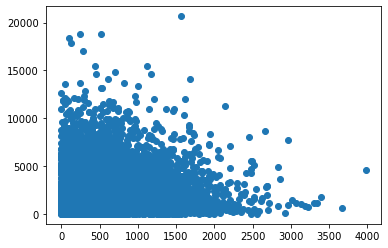

In [9]:
#graficar el área contra el peso
plt.scatter(data['area_cm2_producto'],data['peso_g_producto'])

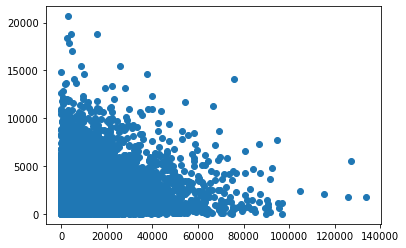

In [10]:
#graficar el volumen contra el peso
plt.scatter(data['volumen_cm3_producto'],data['peso_g_producto'])

Por último vamos a graficar las relaciones con cada uno de los componentes para el cálculo de estas medidas del producto para así analizar gráficamente las relaciones que existen, además para validar estos análisis gráficos la matriz de correlaciones de spearman

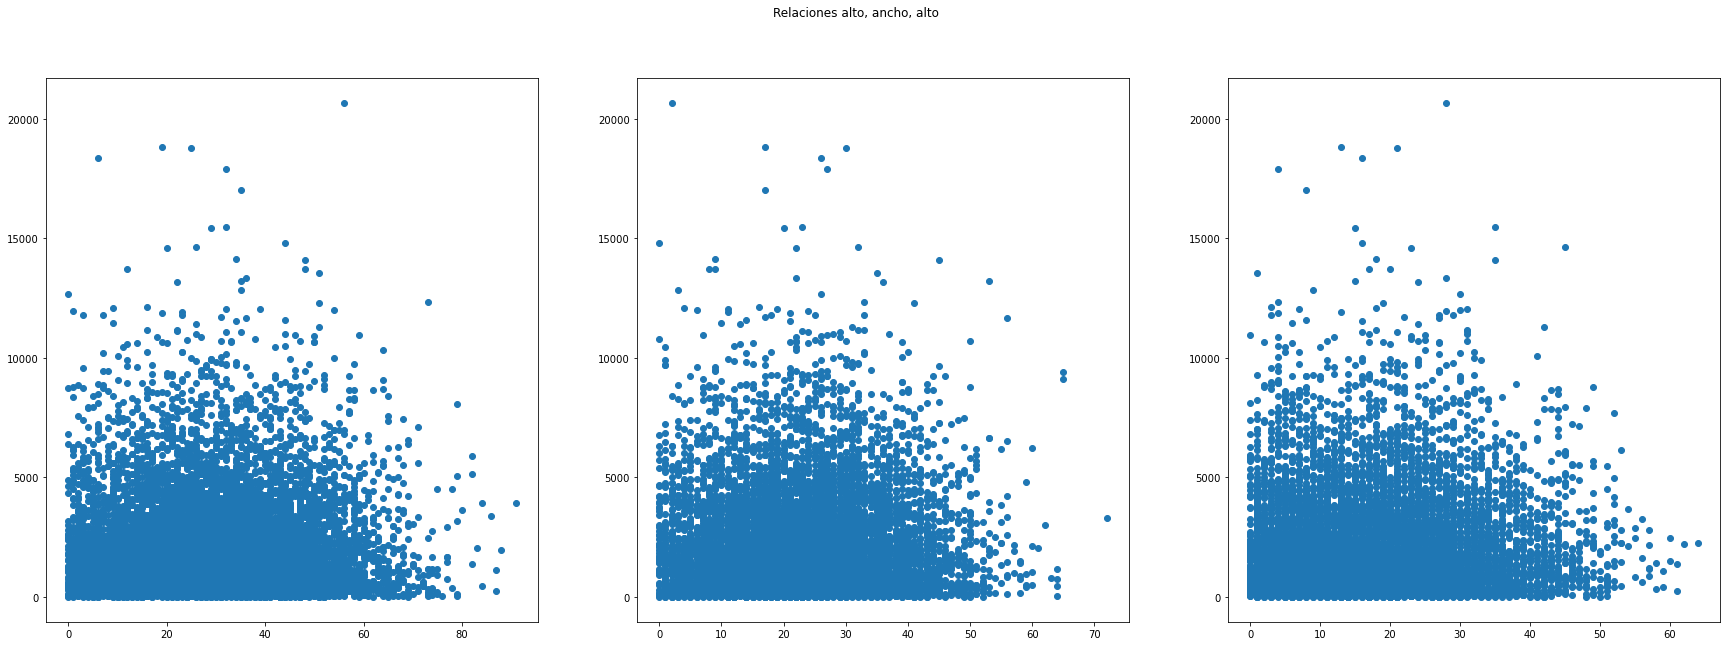

In [11]:
# graficar las demás relaciones alto, ancho, alto
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Relaciones alto, ancho, alto')
ax1.scatter(data['longitud_cm_producto'], data['peso_g_producto'])
ax2.scatter(data['ancho_cm_producto'], data['peso_g_producto'])
ax3.scatter(data['altura_cm_producto'], data['peso_g_producto'])

In [12]:
# matriz de correlaciones de spearman
corr=data[['longitud_cm_producto','altura_cm_producto',
      'ancho_cm_producto','peso_g_producto',
      'area_cm2_producto','volumen_cm3_producto','precio','valor_flete']].corr(method='spearman')
corr

,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto,precio,valor_flete
longitud_cm_producto,1.000000,0.002816,-0.004389,0.013190,0.584639,0.484020,-0.007994,0.001056
altura_cm_producto,0.002816,1.000000,0.011629,0.015161,0.753285,0.631474,-0.003369,-0.000340
ancho_cm_producto,-0.004389,0.011629,1.000000,0.014688,0.007347,0.471033,-0.013001,0.003442
peso_g_producto,0.013190,0.015161,0.014688,1.000000,0.022410,0.022648,-0.009197,-0.003148
area_cm2_producto,0.584639,0.753285,0.007347,0.022410,1.000000,0.838702,-0.006044,0.000411
volumen_cm3_producto,0.484020,0.631474,0.471033,0.022648,0.838702,1.000000,-0.012369,0.003331
precio,-0.007994,-0.003369,-0.013001,-0.009197,-0.006044,-0.012369,1.000000,0.010807
valor_flete,0.001056,-0.000340,0.003442,-0.003148,0.000411,0.003331,0.010807,1.000000


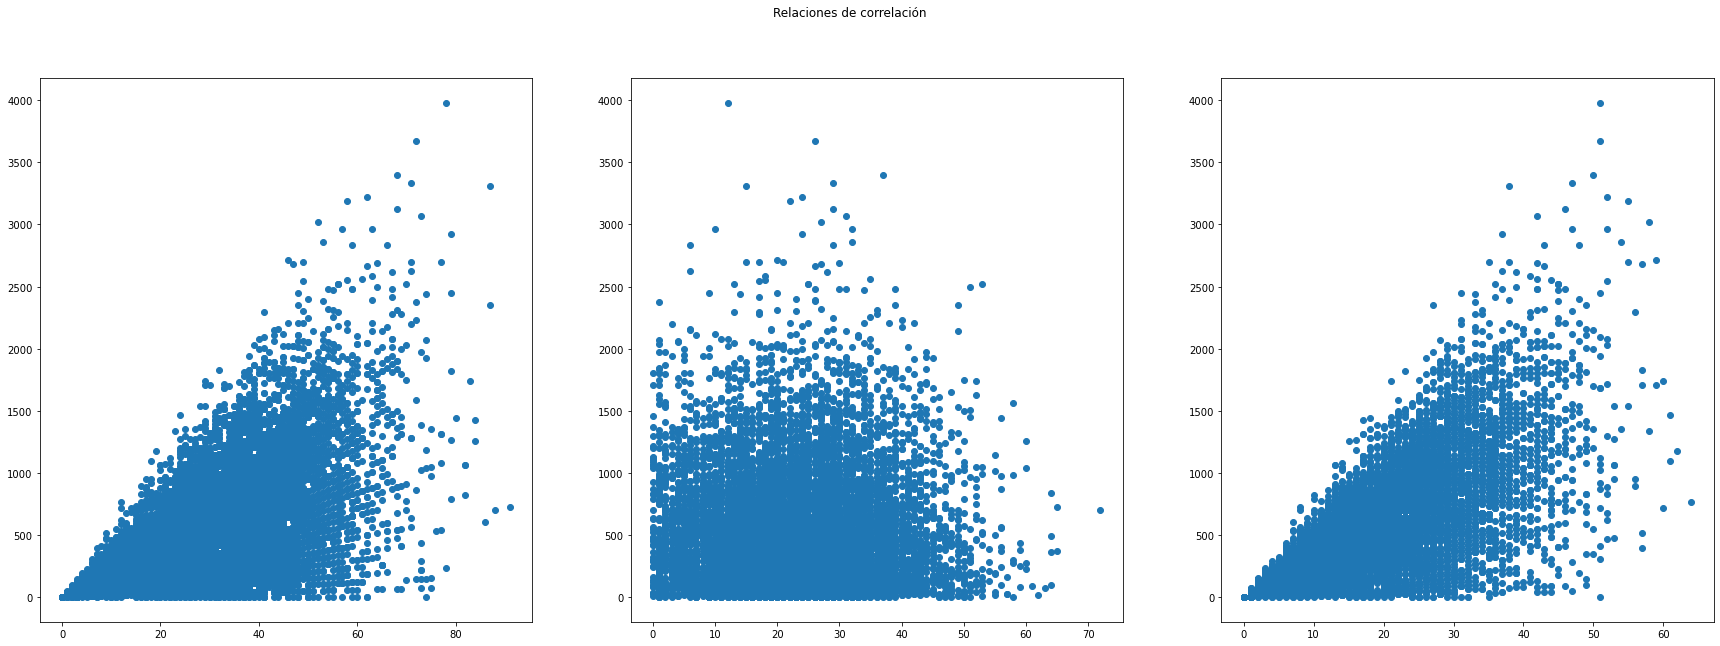

In [13]:
#Graficar las variables con correlación
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(30,10))
fig.suptitle('Relaciones de correlación')
ax1.scatter(data['longitud_cm_producto'], data['area_cm2_producto'])
ax2.scatter(data['ancho_cm_producto'], data['area_cm2_producto'])
ax3.scatter(data['altura_cm_producto'], data['area_cm2_producto'])

Análisis: Podemos revisar que en efecto las medidas para calcular el volúmen y el área no están correlacionadas con el peso, esta interpretación nos va a permitir eventualmente buscar descuentos con la mensajería según otras medidas, por ejemplo, en la tabla las correlaciones que existen son entre longitud y altura, podríamos establecer alguna manera de tarificar el envío a través de estas medidas

In [14]:
#Bonus
#Graficar las correlaciones
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Edwar\AppData\Local\Temp\ipykernel_7260\1884056354.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,longitud_cm_producto,altura_cm_producto,ancho_cm_producto,peso_g_producto,area_cm2_producto,volumen_cm3_producto,precio,valor_flete
longitud_cm_producto,1.00,0.00,-0.00,0.01,0.58,0.48,-0.01,0.00
altura_cm_producto,0.00,1.00,0.01,0.02,0.75,0.63,-0.00,-0.00
ancho_cm_producto,-0.00,0.01,1.00,0.01,0.01,0.47,-0.01,0.00
peso_g_producto,0.01,0.02,0.01,1.00,0.02,0.02,-0.01,-0.00
area_cm2_producto,0.58,0.75,0.01,0.02,1.00,0.84,-0.01,0.00
volumen_cm3_producto,0.48,0.63,0.47,0.02,0.84,1.00,-0.01,0.00
precio,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,1.00,0.01
valor_flete,0.00,-0.00,0.00,-0.00,0.00,0.00,0.01,1.00


![Banner-Introducci-n.png](https://i.postimg.cc/VkCcqsvv/Banner-Introducci-n.png)